In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import display
from PIL import Image

In [6]:
def cleanImagePulse(filename, i, n=3, dataMin = 7000, size = 16384, graph = False):   
    # dataMin is the data required for the pulse to be considered valid - must be >100
    data = np.zeros(dataMin)
    count = 0
    # find a data pulse that works
    for j in range(n):
        data_temp = pd.read_csv(f'{filename}/{filename}_{i}.{j}.csv')
        # if the pulse is located at the end or not existant go to the next one and skip this one
        if np.max(data_temp.iloc[:-dataMin, 2].values) < 0.75:
            continue
        cutoff = np.argmax(data_temp.iloc[:-dataMin, 1].values)
        count += 1
        data += data_temp.iloc[cutoff:cutoff+dataMin, 1].values
    data = data/count
    y = data[500:dataMin-500]
    y -= np.mean(y)
    x = np.arange(len(y))*data_temp.iloc[1,0]
    
    if graph:
        plt.figure(figsize=(20, 8))
        plt.plot(x, y, label=f'{filename}_{i}.{j}')
        plt.ylim(-1, 1)
        plt.legend()
        plt.show()
    return x, y

def graphPulse(filename, i, j=0, lw=2, show=True):
    plt.figure(figsize=(20, 8))
    test_pulse = pd.read_csv(f'{filename}/{filename}_{i}.{j}.csv')
    plt.plot(test_pulse.iloc[:, 0], test_pulse.iloc[:, 1], lw=lw, label=f'{filename}_{i}.{j}')
    if show:
        plt.ylim(-1, 1)
        plt.legend()
        plt.show()
        
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

0
1


<Figure size 1152x720 with 0 Axes>

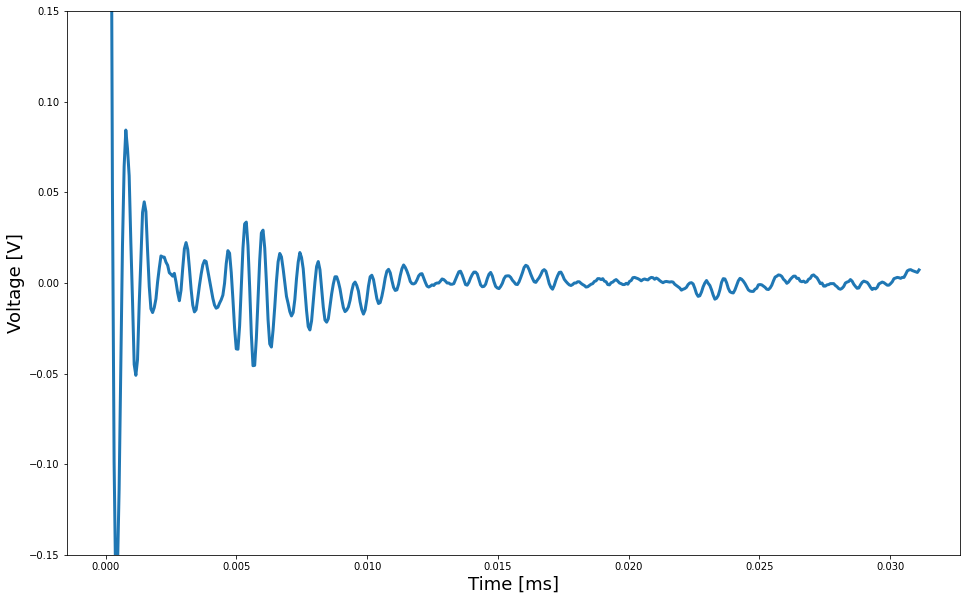

25


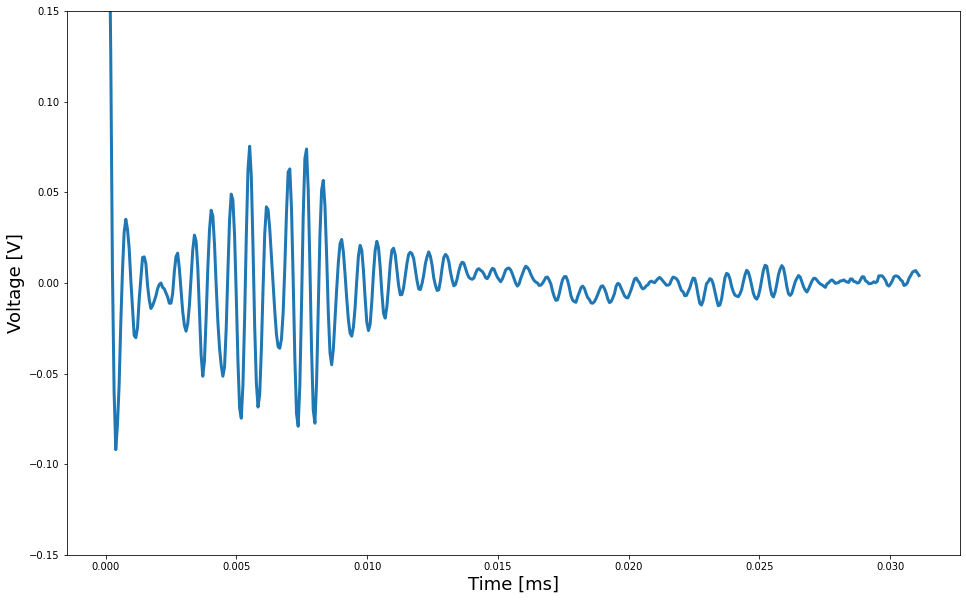

50


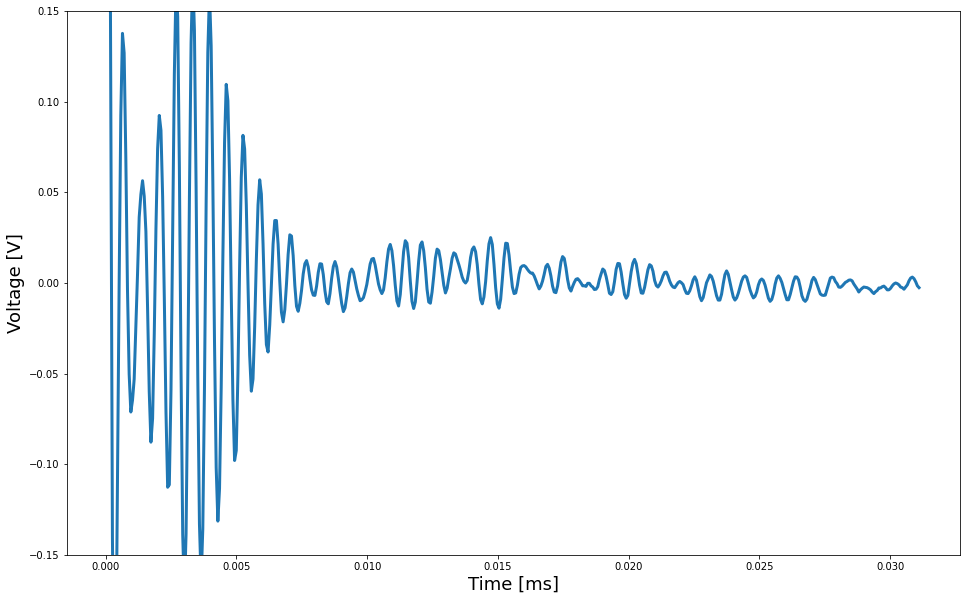

75


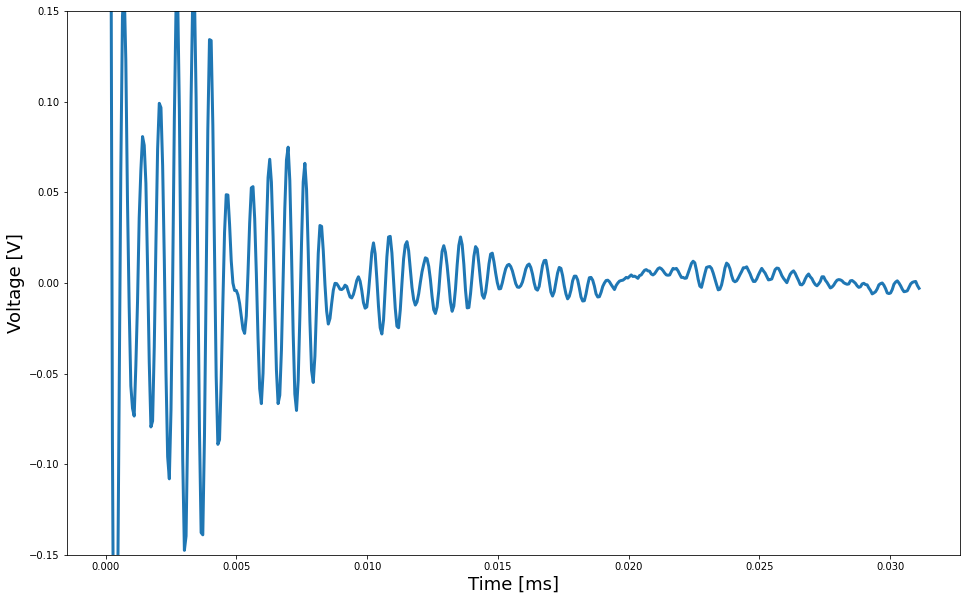

In [8]:
plt.figure(figsize = (16, 10))
N = 15
V = 500
vals = [0, 1, 25]
vals2 = [0, 25]
vals3 = []
vals3.extend(vals)
vals3.extend([z+50 for z in vals2])

dataname = 'exp1.3'
count = 0
for i in vals:
    print(i)
    y = np.zeros(V)
    for j in range(3):
        test_pulse = pd.read_csv(f'{dataname}/{dataname}_{i}.0.csv')
        cutoff = np.argmax(test_pulse.iloc[:-V, 1])
        x = test_pulse.iloc[:V-N+1, 0].values
        y += test_pulse.iloc[cutoff:V+cutoff, 1].values/3
    y = running_mean(y, N) 
    if i == 0:
        normal = np.copy(y)
        continue
    plt.figure(figsize = (16, 10))
    plt.plot(x*1000, y-normal, lw=3)
    plt.ylim((-0.15, 0.15))
    plt.ylabel("Voltage [V]", size = 18)
    plt.xlabel("Time [ms]", size = 18)
    plt.show()
    count += 1
    
dataname = 'exp1.4'
for i in vals2:
    print(i+50)
    y = np.zeros(V)
    for j in range(3):
        test_pulse = pd.read_csv(f'{dataname}/{dataname}_{i}.0.csv')
        cutoff = np.argmax(test_pulse.iloc[:-V, 1])
        x = test_pulse.iloc[:V-N+1, 0].values
        y += test_pulse.iloc[cutoff:V+cutoff, 1].values/3
    y = running_mean(y, N) 
    plt.figure(figsize = (16, 10))
    plt.plot(x*1000, y-normal, lw=3)
    plt.ylim((-0.15, 0.15))
    plt.ylabel("Voltage [V]", size = 18)
    plt.xlabel("Time [ms]", size = 18)
    plt.show()
    count += 1